# Scipy 中的 Fourier 变换
Scipy 提供了 fftpack， 用来计算 Fourier 变换， 以下内容来自官方文档以及链接
https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack.


## 一、 fft 和 ifft
一维离散fourier变换
$$y[k]=\sum_{n=0}^{N-1}e^{-2\pi j kn/N} x[n],$$
$$x[n]=\frac{1}{N} \sum_{k=0}^{N-1}e^{2\pi jkn/N}y[k]$$
FFT的代码格式为 y = fft(x, n=None, axis=- 1, overwrite_x=False)， 其中  
* $x$ 表示输入的数组；
* $n$ 表示 fourier 变换的长度。 如果 $n < x.shape[axis]$, 则数组 $x$ 被截断为前 n 项， 如果 $n>x.shape[axis]$, 则 $x$ 最后面补0， 默认$n=x.shape[axis]$;
* axis 表示需要 fft 的列， 默认为 axis=-1;
* 输出的数组为 $y(0),\cdots, y(n-1).$ 其中
$$y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()$$
同理， 逆变化为 ifft, 这里便不再赘述。

In [4]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x, norm='ortho')
# [x, 0, 0, 0, 0, 0] 的 FFT
y1 = fft(x, n = 10)
print('x:', x, '\n', 'y:', y, '\n', 'y1:', y1, '\n')
y_inv = ifft(y)
print('y_inv:', y_inv)

x: [ 1.   2.   1.  -1.   1.5] 
 y: [ 2.01246118-0.j          0.9309017 -0.73839381j -0.8190983 +0.71921803j
 -0.8190983 -0.71921803j  0.9309017 +0.73839381j] 
 y1: [ 4.5       -0.j          2.02254249-2.05724838j  2.08155948-1.65109876j
 -0.77254249-3.32869781j -1.83155948+1.60822041j  2.5       -0.j
 -1.83155948-1.60822041j -0.77254249+3.32869781j  2.08155948+1.65109876j
  2.02254249+2.05724838j] 

y_inv: [ 0.4472136 +0.j  0.89442719+0.j  0.4472136 +0.j -0.4472136 +0.j
  0.67082039+0.j]


从上述离散Fourier变换的定义可以看出$$y[0]=\sum_{n-0}^{N-1}x[n].$$
也就是说

In [5]:
np.sum(x)

4.5

这恰好等于y_inv的第一个元素。 如果 $n$ 是偶数， 元素 $y[1],\cdots,y[N/2-1]$ 包含正频率项， 元素 $y[N/2],\cdots, y[N-1]$ 包含负频率项， 以负频率逐渐减小来排序； 如果 $n$ 是奇数， 元素 $y[1],\cdots,y[(N-1)/2]$ 包含正频率项， 元素 $y[(N+1)/2],\cdots,y[N-1]$ 包含负频率项, 以负频率逐渐减小来排序。所以， 对8个点的变换， 频率的结果为$[0,1,2,3,-4,-3,-2,-1]$. 为了把0换到中心， 我们可以使用命令 fftshift, 结果为 $[-4, -3, -2, -1, 0, 1, 2, 3]$。 一般地， 我们只画包含正频率项的 FFT。
下面我们画一个两个sine函数相加的频谱：

1.5260015473472777e-13 5.99 
 [ 0.          0.08333333  0.16666667  0.25        0.33333333  0.41666667
  0.5         0.58333333  0.66666667  0.75        0.83333333  0.91666667
  1.          1.08333333  1.16666667  1.25        1.33333333  1.41666667
  1.5         1.58333333  1.66666667  1.75        1.83333333  1.91666667
  2.          2.08333333  2.16666667  2.25        2.33333333  2.41666667
  2.5         2.58333333  2.66666667  2.75        2.83333333  2.91666667
  3.          3.08333333  3.16666667  3.25        3.33333333  3.41666667
  3.5         3.58333333  3.66666667  3.75        3.83333333  3.91666667
  4.          4.08333333  4.16666667  4.25        4.33333333  4.41666667
  4.5         4.58333333  4.66666667  4.75        4.83333333  4.91666667
  5.          5.08333333  5.16666667  5.25        5.33333333  5.41666667
  5.5         5.58333333  5.66666667  5.75        5.83333333  5.91666667
  6.          6.08333333  6.16666667  6.25        6.33333333  6.41666667
  6.5         6.58333

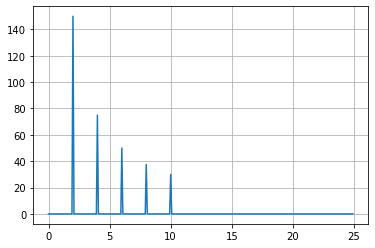

In [64]:
from scipy.fft import fft, fftfreq
import numpy as np
from math import pi
# Number of sample points
N = 600
# sample spacing
T = 1/50
x = np.linspace(0.0, N*T, N, endpoint=False)
def function_f(x):
    value = np.zeros_like(x)
    for i in range(1, 6):
        value = value + np.sin(2 * i * x * 2 * pi) / (2 * i)
    return value
y = function_f(x)
yf = np.abs(fft(y))
xf = fftfreq(N, d=T)[:N//2]
print(np.abs(yf[0]), np.sum(x)/N,'\n', xf)
import matplotlib.pyplot as plt
plt.plot(xf, np.abs(yf[0:N//2]))
plt.grid()
plt.show()

## 二、fft2 和 ifft2 计算二维fourier变换与逆fourier变换
scipy.fft.fft2(x, s=None, axes=- 2, - 1, norm=None, overwrite_x=False, workers=None, *, plan=None)
* x 输入的数组(可以是n维数组)
* s: 对应着fft中的n ,即 $s=[s[0], s[1]]$; 同样有截断与补0的情况；
* axes： fourier变换的轴， 因为是二维， 故有两个， 默认为最后两个；


In [9]:
import scipy.fft 
x = np.mgrid[:5, :5][0]
print('x:', x)
print('fft of x:', scipy.fft.fft2(x))
y = 4 * np.eye(4)
print('y:', y, '\n')
print('fft of y:', scipy.fft.ifft2(x))

x: [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
fft of x: [[ 50.  -0.j           0.  +0.j           0.  +0.j
    0.  -0.j           0.  -0.j        ]
 [-12.5+17.20477401j   0.  +0.j           0.  +0.j
    0.  -0.j           0.  -0.j        ]
 [-12.5 +4.0614962j    0.  +0.j           0.  +0.j
    0.  -0.j           0.  -0.j        ]
 [-12.5 -4.0614962j    0.  +0.j           0.  +0.j
    0.  -0.j           0.  -0.j        ]
 [-12.5-17.20477401j   0.  +0.j           0.  +0.j
    0.  -0.j           0.  -0.j        ]]
y: [[4. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 4.]] 

fft of y: [[ 2. -0.j          0. -0.j          0. -0.j          0. +0.j
   0. +0.j        ]
 [-0.5-0.68819096j  0. +0.j          0. +0.j          0. -0.j
   0. -0.j        ]
 [-0.5-0.16245985j  0. +0.j          0. +0.j          0. -0.j
   0. -0.j        ]
 [-0.5+0.16245985j  0. +0.j          0. +0.j          0. -0.j
   0. -0.j        ]
 [-0.5+0.68819096j  0. +0.j          0. +0.j          0.

## 三、fftn 和 ifftn
我们只给出相应的例子

In [10]:
import scipy.fft
x = np.mgrid[:3, :3, :3][0]
print('x:', x, '\n')
print('fft of x:', scipy.fft.fftn(x, axes=(1, 2)),'\n')
print('ifft of x:', scipy.fft.fftn(x,(2,2), axes=(0,1)))

x: [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]] 

fft of x: [[[ 0.-0.j  0.+0.j  0.-0.j]
  [ 0.+0.j  0.+0.j  0.-0.j]
  [ 0.-0.j  0.+0.j  0.-0.j]]

 [[ 9.-0.j  0.+0.j  0.-0.j]
  [ 0.+0.j  0.+0.j  0.-0.j]
  [ 0.-0.j  0.+0.j  0.-0.j]]

 [[18.-0.j  0.+0.j  0.-0.j]
  [ 0.+0.j  0.+0.j  0.-0.j]
  [ 0.-0.j  0.+0.j  0.-0.j]]] 

ifft of x: [[[ 2.-0.j  2.-0.j  2.-0.j]
  [ 0.-0.j  0.-0.j  0.-0.j]]

 [[-2.-0.j -2.-0.j -2.-0.j]
  [ 0.-0.j  0.-0.j  0.-0.j]]]


## 四、fftfreq 和 fftshift
scipy 提供了两个非常有用的函数： fftfreq 和 fftshift

scipy.fft.fftfreq(n, d=1.0) 返回离散的 fourier 采样频率

$f = [0, 1, ..., n/2-1, -n/2, ..., -1] / (d*n)$ if n is even

$f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)$ if n is odd

scipy.fft.fftshift(x, axes=None) 将 0 频率变换到谱中央


In [11]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
print('freq:', freq)

freq: [ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]


In [12]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

# 常见的例子

(1000,)


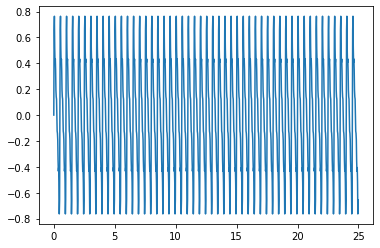

1.0485084638649087e-12


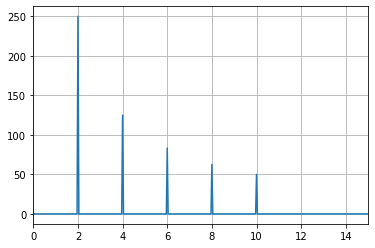

In [75]:
import numpy as np
from math import pi
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
N = 1000
T = 1 / 40

# sample spacing
x = np.linspace(0, N*T, N, endpoint=False)
print(x.shape)
def function_f(x):
    value = np.zeros_like(x)
    for i in range(1, 6):
        value = value + np.sin(2 * i * x * 2 * pi) / (2 * i)
    return value
f_value = function_f(x)
plt.figure()
plt.plot(x, f_value)
plt.show()

y = function_f(x)
yf = np.abs(fft(y))
print(yf[0])
x_half = x[:N//2]
xf = fftfreq(N, d=T)[:N//2]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(xf, np.abs(yf[0:N//2]))
plt.xlim([0, 15])
plt.grid()
plt.show()
